In [63]:
import pandas as pd
import numpy as np
import glob, os, sys
import time
import pickle
import datetime

In [2]:
df = pd.read_csv('finalset/patient_data_4830_hours.csv')
df.head(50)

,SUBJECT_ID,TimeStamp,Albumin,Alk. Phosphate,ALT,AST,Total Bili,BUN,Cholesterol,Creatinine,...,Platelets,Respiratory Rate,SaO2,Arterial BP [Systolic],Temperature C,TroponinI,TroponinT,Urine,WBC,Previous WeightF
0,17,0 days 00:00:00.000000000,0.0,0.0,0.0,0.0,0.0,0.060606,0.0,0.009424,...,0.103116,0.143564,0.990099,0.445489,0.0,0.0,0.0,0.0,0.021739,0.0
1,17,1 days 11:30:00.000000000,0.0,0.0,0.0,0.0,0.0,0.060606,0.0,0.008377,...,0.188427,0.188119,0.980198,0.375940,0.0,0.0,0.0,0.0,0.040076,0.0
2,17,1 days 11:00:00.000000000,0.0,0.0,0.0,0.0,0.0,0.060606,0.0,0.008377,...,0.188427,0.188119,0.980198,0.375940,0.0,0.0,0.0,0.0,0.040076,0.0
3,17,1 days 10:30:00.000000000,0.0,0.0,0.0,0.0,0.0,0.060606,0.0,0.008377,...,0.188427,0.188119,0.980198,0.375940,0.0,0.0,0.0,0.0,0.040076,0.0
4,17,1 days 10:00:00.000000000,0.0,0.0,0.0,0.0,0.0,0.060606,0.0,0.008377,...,0.188427,0.178218,0.980198,0.357143,0.0,0.0,0.0,0.0,0.040076,0.0
5,17,1 days 09:30:00.000000000,0.0,0.0,0.0,0.0,0.0,0.060606,0.0,0.008377,...,0.188427,0.178218,0.980198,0.357143,0.0,0.0,0.0,0.0,0.040076,0.0
6,17,1 days 09:00:00.000000000,0.0,0.0,0.0,0.0,0.0,0.060606,0.0,0.008377,...,0.188427,0.178218,0.980198,0.357143,0.0,0.0,0.0,0.0,0.040076,0.0
7,17,1 days 08:30:00.000000000,0.0,0.0,0.0,0.0,0.0,0.060606,0.0,0.008377,...,0.188427,0.178218,0.980198,0.357143,0.0,0.0,0.0,0.0,0.040076,0.0
8,17,1 days 08:00:00.000000000,0.0,0.0,0.0,0.0,0.0,0.060606,0.0,0.008377,...,0.188427,0.158416,0.980198,0.349624,0.0,0.0,0.0,0.0,0.040076,0.0
9,17,1 days 07:30:00.000000000,0.0,0.0,0.0,0.0,0.0,0.060606,0.0,0.008377,...,0.188427,0.158416,0.980198,0.349624,0.0,0.0,0.0,0.0,0.040076,0.0


In [84]:
ff = df.groupby('SUBJECT_ID')
p = []
for s,g in ff:
    p.append((s,len(g)))

In [85]:
for g in p:
    if g[1]!=98:
        print(g[0])

In [86]:
matrix3D = np.array(df.drop(['SUBJECT_ID', 'TimeStamp'], 1))
matrix3D

array([[0.        , 0.        , 0.        , ..., 0.        , 0.02173913,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.04007561,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.04007561,
        0.        ],
       ...,
       [0.79032258, 0.        , 0.00204374, ..., 0.        , 0.01039698,
        0.        ],
       [0.79032258, 0.        , 0.00204374, ..., 0.        , 0.01039698,
        0.        ],
       [0.79032258, 0.        , 0.00204374, ..., 0.        , 0.01342155,
        0.        ]])

In [87]:
matrix3D.shape

(645526, 37)

In [88]:
matrix3D = np.array(matrix3D).reshape((6587, 98, 37))
matrix3D.shape

(6587, 98, 37)

In [89]:
outcomes = pd.read_csv('finalset/outcomes.csv')
outcomes.head(10)

,SUBJECT_ID,LABEL
0,17,0
1,21,0
2,23,0
3,34,0
4,36,1
5,61,0
6,68,1
7,85,0
8,94,0
9,103,1


In [90]:
Y = np.array(outcomes.drop(['SUBJECT_ID'], 1))
Y.shape

(6587, 1)

In [91]:
X = matrix3D
X.shape

(6587, 98, 37)

In [ ]:
X = np.concatenate((X,X))
X.shape

In [12]:
Y = np.concatenate((Y,Y))
Y.shape

(13174, 1)

In [13]:
X = np.concatenate((X,X))
#X = np.concatenate((X,X))
X.shape

(26348, 98, 37)

In [14]:
Y = np.concatenate((Y,Y))
#Y = np.concatenate((Y,Y))
Y.shape

(26348, 1)

In [92]:
X_new = X.reshape(X.shape[0],1,X.shape[1],X.shape[2])
X_new.shape

(6587, 1, 98, 37)

In [93]:
Y_new = Y.reshape(Y.shape[0],1,Y.shape[1])
print(Y_new.shape)

(6587, 1, 1)


In [94]:
X_new = np.insert(X_new, 1, Y_new, axis=1)
X_new.shape

(6587, 2, 98, 37)

In [116]:
np.random.shuffle(X_new)
X_new.shape

(6587, 2, 98, 37)

In [117]:
X = X_new[:,0]

X.shape

(6587, 98, 37)

In [118]:
Y = X_new[:,1]
Y = Y[:,0]
Y = Y[:,0]
Y = Y.reshape(Y.shape[0],1)
Y.shape

(6587, 1)

In [119]:
X_train = X[:4800]
X_test = X[4800:]
Y_train = Y[:4800]
Y_test = Y[4800:]
display(X_train.shape)
display(X_test.shape)
display(Y_train.shape)
display(Y_test.shape)

(4800, 98, 37)

(1787, 98, 37)

(4800, 1)

(1787, 1)

In [120]:
X_tr = X_train.reshape((X_train.shape[0],1,X_train.shape[1],X_train.shape[2]))
X_te = X_test.reshape((X_test.shape[0],1,X_test.shape[1],X_test.shape[2]))
display(X_tr.shape)
X_te.shape

(4800, 1, 98, 37)

(1787, 1, 98, 37)

In [124]:
a = [X_train,Y_train,X_test,Y_test]
a

[array([[[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]],
 
        [[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.2209622 ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.2209622 ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.2209622 ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.

In [125]:
with open('finalset/datasets_og.pickle', 'wb') as handle:
    pickle.dump(a, handle, protocol = pickle.HIGHEST_PROTOCOL)

In [126]:
sum(Y_train)

array([1825.])

In [127]:
sum(Y_test)

array([636.])

In [199]:
X_trainr = np.concatenate((X_train,X_train))
X_trainr = np.concatenate((X_trainr,X_trainr))
X_trainr = np.concatenate((X_trainr,X_train))
display(X_train.shape)
X_trainr.shape

(4800, 98, 37)

(24000, 98, 37)

In [201]:
Y_trainr = np.concatenate((Y_train,Y_train))
Y_trainr = np.concatenate((Y_trainr,Y_trainr))
Y_trainr = np.concatenate((Y_trainr,Y_train))
display(Y_train.shape)
Y_trainr.shape

(4800, 1)

(24000, 1)

In [217]:
Y_testr = np.concatenate((Y_test,Y_test))
Y_testr.shape

(3574, 1)

In [218]:
X_testr = np.concatenate((X_test,X_test))
X_testr.shape

(3574, 98, 37)

In [222]:
from keras.layers import Reshape,MaxPooling1D,Conv1D
model8ecw = Sequential()
model8ecw.add(Conv1D(32, kernel_size=5, input_shape=(X_train.shape[1],X_train.shape[2]), activation='relu', padding='same',data_format="channels_last"))
model8ecw.add(Conv1D(32, 5, activation='relu', padding='same'))
model8ecw.add(Conv1D(64, 5, activation='relu', padding='same'))
model8ecw.add(MaxPooling1D(pool_size=2,data_format="channels_first"))
model8ecw.add(Conv1D(128, 5, activation='relu', padding='same'))
model8ecw.add(MaxPooling1D(pool_size=2,data_format="channels_first"))
model8ecw.add(Conv1D(128, 5, activation='relu', padding='same'))
model8ecw.add(MaxPooling1D(pool_size=2,data_format="channels_first"))
#model8ecw.add(Reshape((98,100)))
model8ecw.add(LSTM(128,input_shape=(98,64),activation='relu',return_sequences=True))
model8ecw.add(Bidirectional(LSTM(64,activation='relu',return_sequences=True)))
model8ecw.add(Dropout(0.2))
model8ecw.add(Bidirectional(LSTM(32,activation='relu')))
model8ecw.add(Dropout(0.2))
#model.add(BatchNormalization(axis=1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))
model8ecw.add(Dense(1024,activation='tanh'))
model8ecw.add(Dropout(0.2))
model8ecw.add(Dense(256,activation='tanh'))
model8ecw.add(Dropout(0.2))
#model.add(Dense(20,activation='tanh'))
model8ecw.add(Dense(32,activation='tanh'))
model8ecw.add(Dense(1, activation='sigmoid'))
model8ecw.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
display(model8ecw.summary())
model8ecw.fit(X_trainr, Y_trainr, validation_data=(X_testr, Y_testr), epochs=10,batch_size=1000,verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_113 (Conv1D)          (None, 98, 32)            5952      
_________________________________________________________________
conv1d_114 (Conv1D)          (None, 98, 32)            5152      
_________________________________________________________________
conv1d_115 (Conv1D)          (None, 98, 64)            10304     
_________________________________________________________________
max_pooling1d_64 (MaxPooling (None, 98, 32)            0         
_________________________________________________________________
conv1d_116 (Conv1D)          (None, 98, 128)           20608     
_________________________________________________________________
max_pooling1d_65 (MaxPooling (None, 98, 64)            0         
_________________________________________________________________
conv1d_117 (Conv1D)          (None, 98, 128)           41088     
__________

None

Train on 24000 samples, validate on 3574 samples
Epoch 1/10
24000/24000 [==============================] - 123s 5ms/step - loss: 0.6639 - acc: 0.6148 - val_loss: 0.6492 - val_acc: 0.6441
Epoch 2/10
24000/24000 [==============================] - 101s 4ms/step - loss: 0.6545 - acc: 0.6198 - val_loss: 0.6549 - val_acc: 0.6363
Epoch 3/10
24000/24000 [==============================] - 98s 4ms/step - loss: 0.6446 - acc: 0.6355 - val_loss: 0.6378 - val_acc: 0.6603
Epoch 4/10
24000/24000 [==============================] - 101s 4ms/step - loss: 0.6393 - acc: 0.6387 - val_loss: 0.6501 - val_acc: 0.6419
Epoch 5/10
24000/24000 [==============================] - 99s 4ms/step - loss: 0.6334 - acc: 0.6452 - val_loss: 0.6449 - val_acc: 0.6514
Epoch 6/10
24000/24000 [==============================] - 145s 6ms/step - loss: 0.6299 - acc: 0.6482 - val_loss: 0.6480 - val_acc: 0.6530
Epoch 7/10
24000/24000 [==============================] - 213s 9ms/step - loss: 0.6276 - acc: 0.6489 - val_loss: 0.6599 - val

In [206]:
scores = model8ecw.evaluate(X_test, Y_test)
scores[1]*100

1787/1787 [==============================] - 3s 2ms/step


66.03245660454185

In [223]:
scores = model8ecw.evaluate(X_test, Y_test)
scores[1]*100

1787/1787 [==============================] - 9s 5ms/step


64.40962507662056

In [224]:
from keras.models import model_from_json

#save keras model
model_json = model8ecw.to_json()
with open("models/vdeepconvblstm4timestrain.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model8ecw.save_weights("models/vdeepconvblstm4timestrain.h5")
print("Saved model to disk")

Saved model to disk


In [64]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM,Add
from keras.layers import Dropout,Bidirectional,BatchNormalization,Conv2D

In [65]:
model8 = Sequential()
model8.add(LSTM(100, input_shape=(X_train.shape[1],X_train.shape[2]),return_sequences=True))
model8.add(LSTM(50))
model8.add(Dropout(0.2))
#model.add(BatchNormalization(axis=1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))
model8.add(Dense(100,activation='tanh'))
model8.add(Dense(25,activation='tanh'))
#model.add(Dense(20,activation='tanh'))
model8.add(Dense(10,activation='tanh'))
model8.add(Dense(1, activation='sigmoid'))
model8.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model8.summary())
model8.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30,batch_size=500,verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_48 (LSTM)               (None, 98, 100)           52400     
_________________________________________________________________
lstm_49 (LSTM)               (None, 50)                30200     
_________________________________________________________________
dropout_42 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_93 (Dense)             (None, 100)               5100      
_________________________________________________________________
dense_94 (Dense)             (None, 25)                2525      
_________________________________________________________________
dense_95 (Dense)             (None, 10)                260       
_________________________________________________________________
dense_96 (Dense)             (None, 1)                 11        
Total para

In [66]:
scores = model8.evaluate(X_test, Y_test)
scores[1]*100

10392/10392 [==============================] - 9s 828us/step


79.84026174438836

In [67]:
y_pred = model8.predict(X_test)
y_pred

array([[0.545015  ],
       [0.05126255],
       [0.34637684],
       ...,
       [0.3327171 ],
       [0.35958487],
       [0.36133274]], dtype=float32)

In [68]:
score = 1.0 - roc_auc_score(Y_test, y_pred)



display(score)


f_score=f1_score(Y_test,y_pred.round())

display(f_score)





prfs=precision_recall_fscore_support(Y_test,y_pred.round())


display(prfs)




f_score_micro=f1_score(Y_test,y_pred.round(),average='micro')
f_score_macro=f1_score(Y_test,y_pred.round(),average='macro')

display(f_score_micro)
display(f_score_macro)




cf=confusion_matrix(Y_test,y_pred.round())

display(cf)




print("AUC : "+str(1.0 - score)+",  Score/Loss : "+str(score)+", F1_Score_average: "+str(f_score)+", Precision, Recall, F1_score, Support: "+str(prfs))
print("F1_score_micro: "+str(f_score_micro))
print("F1_score_macro: "+str(f_score_macro))
print("Confusion Matrix")
print(cf)
print("END\n\n")



0.1200871696311796

0.6649608188069727

(array([0.77203874, 0.88922156]),
 array([0.96001235, 0.53103448]),
 array([0.85582548, 0.66496082]),
 array([6477, 3915]))

0.7984026173979984

0.7603931476871557

array([[6218,  259],
       [1836, 2079]])

AUC : 0.8799128303688204,  Score/Loss : 0.1200871696311796, F1_Score_average: 0.6649608188069727, Precision, Recall, F1_score, Support: (array([0.77203874, 0.88922156]), array([0.96001235, 0.53103448]), array([0.85582548, 0.66496082]), array([6477, 3915]))
F1_score_micro: 0.7984026173979984
F1_score_macro: 0.7603931476871557
Confusion Matrix
[[6218  259]
 [1836 2079]]
END




In [69]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

{1: 0.8799128303688204}

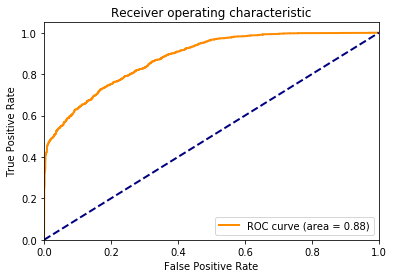

In [71]:



# In[271]:


fpr = dict()
tpr = dict()
roc_auc = dict()
fpr[1], tpr[1], _ = roc_curve(Y_test[:, 0], y_pred[:, 0])
roc_auc[1] = auc(fpr[1], tpr[1])


# In[272]:


display(roc_auc)


# In[275]:


plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [61]:
import pickle
with open('finalset/datasets_16times.pickle', 'rb') as handle:
    [X_train,  Y_train,X_test,Y_test] = pickle.load(handle)
    print("yes")
print("here")

yes
here


In [62]:
display(X_train.shape)
display(X_test.shape)
display(Y_train.shape)
display(Y_test.shape)

(95000, 98, 30)

(10392, 98, 30)

(95000, 1)

(10392, 1)

In [6]:
X_train = X_train[:47000]
Y_train = Y_train[:47000]
display(X_train.shape)
display(X_test.shape)
display(Y_train.shape)
display(Y_test.shape)

(47000, 98, 30)

(10392, 98, 30)

(47000, 1)

(10392, 1)

In [6]:
model8e = Sequential()
model8e.add(LSTM(100, input_shape=(X_train.shape[1],X_train.shape[2]),return_sequences=True))
model8e.add(Bidirectional(LSTM(25)))
model8e.add(Dropout(0.2))
#model.add(BatchNormalization(axis=1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))
model8e.add(Dense(100,activation='tanh'))
model8e.add(Dense(25,activation='tanh'))
#model.add(Dense(20,activation='tanh'))
model8e.add(Dense(10,activation='tanh'))
model8e.add(Dense(1, activation='sigmoid'))
model8e.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model8e.summary())
model8e.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30,batch_size=1000,verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 98, 100)           52400     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 50)                25200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_2 (Dense)              (None, 25)                2525      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                260       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total para

In [7]:
scores = model8e.evaluate(X_test, Y_test)
scores[1]*100

10392/10392 [==============================] - 8s 726us/step


67.70592763205508

In [253]:
X_tr = X_train.reshape((X_train.shape[0],1,X_train.shape[1],X_train.shape[2]))
X_te = X_test.reshape((X_test.shape[0],1,X_test.shape[1],X_test.shape[2]))
display(X_tr.shape)
X_te.shape

(47000, 1, 98, 30)

(10392, 1, 98, 30)

In [254]:
display(X_tr.shape)
X_te.shape

(47000, 1, 98, 30)

(10392, 1, 98, 30)

In [78]:
from keras.layers import Reshape
model8ec = Sequential()
model8ec.add(Conv2D(45, (5,5), input_shape=(X_tr.shape[1],X_tr.shape[2],X_tr.shape[3]), activation='relu', padding='same'))
model8ec.add(Reshape((98,45)))
model8ec.add(LSTM(100,input_shape=(98,45)))
#model8ec.add(Bidirectional(LSTM(25)))
model8ec.add(Dropout(0.2))
#model.add(BatchNormalization(axis=1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))
model8ec.add(Dense(100,activation='tanh'))
model8ec.add(Dense(25,activation='tanh'))
#model.add(Dense(20,activation='tanh'))
model8ec.add(Dense(10,activation='tanh'))
model8ec.add(Dense(1, activation='sigmoid'))
model8ec.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
display(model8ec.summary())
model8ec.fit(X_tr, Y_train, validation_data=(X_te, Y_test), epochs=30,batch_size=1000,verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 1, 98, 45)         33795     
_________________________________________________________________
reshape_21 (Reshape)         (None, 98, 45)            0         
_________________________________________________________________
lstm_27 (LSTM)               (None, 100)               58400     
_________________________________________________________________
dropout_20 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_63 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_64 (Dense)             (None, 25)                2525      
_________________________________________________________________
dense_65 (Dense)             (None, 10)                260       
__________

None

Train on 47000 samples, validate on 10392 samples
Epoch 1/30
47000/47000 [==============================] - 28s 594us/step - loss: 0.6514 - acc: 0.6333 - val_loss: 0.6424 - val_acc: 0.6381
Epoch 2/30
47000/47000 [==============================] - 26s 558us/step - loss: 0.6400 - acc: 0.6406 - val_loss: 0.6424 - val_acc: 0.6390
Epoch 3/30
47000/47000 [==============================] - 26s 557us/step - loss: 0.6392 - acc: 0.6403 - val_loss: 0.6398 - val_acc: 0.6379
Epoch 4/30
47000/47000 [==============================] - 26s 562us/step - loss: 0.6339 - acc: 0.6457 - val_loss: 0.6352 - val_acc: 0.6450
Epoch 5/30
47000/47000 [==============================] - 27s 566us/step - loss: 0.6294 - acc: 0.6489 - val_loss: 0.6313 - val_acc: 0.6448
Epoch 6/30
47000/47000 [==============================] - 25s 529us/step - loss: 0.6293 - acc: 0.6496 - val_loss: 0.6345 - val_acc: 0.6480
Epoch 7/30
47000/47000 [==============================] - 24s 515us/step - loss: 0.6290 - acc: 0.6510 - val_loss: 0.

In [80]:
scores = model8ec.evaluate(X_te, Y_test)
scores[1]*100

10392/10392 [==============================] - 7s 649us/step


70.98729792147806

In [255]:
scores = model8ec.evaluate(X_te, Y_test)
scores[1]*100

10392/10392 [==============================] - 13s 1ms/step


70.98729792147806

In [257]:
model8ec.predict(X_te)

array([[0.7304075 ],
       [0.1507901 ],
       [0.65374446],
       ...,
       [0.2640968 ],
       [0.260233  ],
       [0.37081453]], dtype=float32)

In [258]:
k = model8ec.predict(X_te)

In [259]:
k.shape

(10392, 1)

In [33]:
from sklearn.metrics import mean_squared_error
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import StratifiedKFold
import pandas as pd;
import numpy as np;
from sklearn import model_selection
from sklearn.metrics import roc_auc_score, f1_score,precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

In [262]:
score = 1.0 - roc_auc_score(Y_test, k)
score

0.24793387191261895

In [263]:
f_score=f1_score(Y_test,k.round())
f_score

0.5383555351401011

In [264]:
prfs=precision_recall_fscore_support(Y_test,k.round())
prfs

(array([0.72260802, 0.67201835]),
 array([0.86753126, 0.44904215]),
 array([0.78846559, 0.53835554]),
 array([6477, 3915]))

In [265]:
f_score_micro=f1_score(Y_test,k.round(),average='micro')
f_score_macro=f1_score(Y_test,k.round(),average='macro')
display(f_score_micro)
f_score_macro

0.7098729792147805

0.6634105606662408

In [266]:
cf=confusion_matrix(Y_test,k.round())
cf

array([[5619,  858],
       [2157, 1758]])

In [268]:
print("AUC : "+str(1.0 - score)+",  Score/Loss : "+str(score)+", F1_Score_average: "+str(f_score)+", Precision, Recall, F1_score, Support: "+str(prfs))
print("F1_score_micro: "+str(f_score_micro))
print("F1_score_macro: "+str(f_score_macro))
print("Confusion Matrix")
print(cf)
print("END\n\n")

AUC : 0.752066128087381,  Score/Loss : 0.24793387191261895, F1_Score_average: 0.5383555351401011, Precision, Recall, F1_score, Support: (array([0.72260802, 0.67201835]), array([0.86753126, 0.44904215]), array([0.78846559, 0.53835554]), array([6477, 3915]))
F1_score_micro: 0.7098729792147805
F1_score_macro: 0.6634105606662408
Confusion Matrix
[[5619  858]
 [2157 1758]]
END




In [28]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

In [271]:
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr[1], tpr[1], _ = roc_curve(Y_test[:, 0], k[:, 0])
roc_auc[1] = auc(fpr[1], tpr[1])

In [272]:
roc_auc

{1: 0.752066128087381}

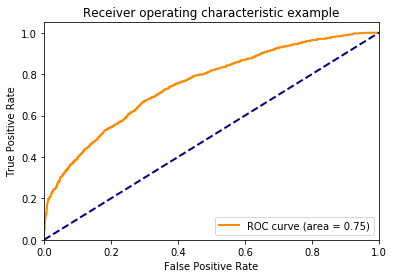

In [275]:
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [81]:
from keras.models import model_from_json

#save keras model
model_json = model8ec.to_json()
with open("models/convlstm.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model8ec.save_weights("models/convlstm.h5")
print("Saved model to disk")

Saved model to disk


In [278]:
X_train.shape

(47000, 98, 30)

In [284]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1],X_train.shape[2]),return_sequences=True))
model.add(LSTM(25))
model.add(Dropout(0.2))
#model.add(BatchNormalization(axis=1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))
model.add(Dense(100,activation='tanh'))
model.add(Dense(25,activation='tanh'))
#model.add(Dense(20,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
#model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10,batch_size=50,verbose=1)

TypeError: __init__() got an unexpected keyword argument 'input_shape'

In [57]:
scores = model.evaluate(X_test, Y_test)
scores[1]*100

5296/5296 [==============================] - 4s 700us/step


64.35045317220543

In [59]:
modelq = Sequential()
modelq.add(LSTM(100, input_shape=(X_train.shape[1],X_train.shape[2]),return_sequences=True))
modelq.add(Bidirectional(LSTM(25,activation='selu')))
modelq.add(Dropout(0.2))
#model.add(BatchNormalization(axis=1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))
modelq.add(Dense(100,activation='selu'))
modelq.add(Dense(25,activation='selu'))
#model.add(Dense(20,activation='tanh'))
modelq.add(Dense(10,activation='selu'))
modelq.add(Dense(1, activation='sigmoid'))
modelq.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(modelq.summary())
modelq.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=3,batch_size=8,verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 98, 100)           55200     
_________________________________________________________________
bidirectional_6 (Bidirection (None, 50)                25200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 100)               5100      
_________________________________________________________________
dense_22 (Dense)             (None, 25)                2525      
_________________________________________________________________
dense_23 (Dense)             (None, 10)                260       
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 11        
Total para

In [60]:
scores = modelq.evaluate(X_test, Y_test)
scores[1]*100

5296/5296 [==============================] - 4s 755us/step


62.7643504531722

In [64]:
from keras.models import model_from_json

#save keras model
model_json = modelq.to_json()
with open("models/model4times_100batch.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
modelq.save_weights("models/model4times_100batch.h5")
print("Saved model to disk")

Saved model to disk


In [68]:
modelb = Sequential()
modelb.add(LSTM(100, input_shape=(X_train.shape[1],X_train.shape[2]),return_sequences=True))
modelb.add(Bidirectional(LSTM(50),merge_mode='concat'))
modelb.add(Dropout(0.2))
#modelb.add(BatchNormalization(axis=1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))
modelb.add(Dense(100,activation='tanh'))
modelb.add(Dense(25,activation='tanh'))
modelb.add(Dense(10,activation='tanh'))
modelb.add(Dense(1, activation='sigmoid'))
modelb.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(modelb.summary())
modelb.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10,batch_size=100,verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 98, 100)           55200     
_________________________________________________________________
bidirectional_6 (Bidirection (None, 100)               60400     
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_22 (Dense)             (None, 25)                2525      
_________________________________________________________________
dense_23 (Dense)             (None, 10)                260       
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 11        
Total para

In [69]:
scoresb = modelb.evaluate(X_test, Y_test)
scoresb[1]*100

5348/5348 [==============================] - 13s 2ms/step


63.68735976065819

In [71]:
from keras.models import model_from_json

#save keras model
model_json = modelb.to_json()
with open("models/model4times_10epoch.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
modelb.save_weights("models/model4times_10epoch.h5")
print("Saved model to disk")

Saved model to disk


In [9]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [47]:
ans = []
cnt = 0
anss = []
class CLSTM(object):
    def __init__(self):
        # define lower bound of benchmark function
        self.Lower = 0
        # define upper bound of benchmark function
        self.Upper = 1

    # function which returns evaluate function
    def function(self):
        def evalute(D,sol):
            global cnt
            cnt = cnt +1
            print(cnt,end=" ")
            from keras.models import Sequential
            from keras.layers import Dense
            from keras.layers import LSTM
            from keras.layers import Dropout,Bidirectional
            from keras.layers import Reshape,MaxPooling1D,Conv1D
            from keras.layers import Reshape
            sol = np.array(sol)
            sol = sigmoid(sol)
            #display(sol)
            op = sol>=0.6
            X_tr = X_train[:,:,op]
            X_te = X_test[:,:,op]
            X_tr  = X_tr.reshape((X_tr.shape[0],1,X_tr.shape[1],X_tr.shape[2]))
            X_te  = X_te.reshape((X_te.shape[0],1,X_te.shape[1],X_te.shape[2]))
            modelf = Sequential()
            modelf.add(Conv2D(45, (5,5), input_shape=(X_tr.shape[1],X_tr.shape[2],X_tr.shape[3]), activation='relu', padding='same'))
            modelf.add(Reshape((98,45)))
            modelf.add(LSTM(100,input_shape=(98,45)))
            #model8ec.add(Bidirectional(LSTM(25)))
            modelf.add(Dropout(0.2))
            #model.add(BatchNormalization(axis=1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))
            modelf.add(Dense(100,activation='tanh'))
            modelf.add(Dense(25,activation='tanh'))
            #model.add(Dense(20,activation='tanh'))
            modelf.add(Dense(10,activation='tanh'))
            modelf.add(Dense(1, activation='sigmoid'))
            modelf.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
            modelf.fit(X_tr, Y_train, validation_data=(X_te, Y_test), epochs=30,batch_size=1000,verbose=0)
            scores = modelf.evaluate(X_te, Y_test, verbose=0)
            anss.append((scores[1],modelf,op))
            k = -1*scores[1]
            return k
        return evalute

In [72]:
ans = []
cnt = 0
anss = []
class LSTM(object):
    def __init__(self):
        # define lower bound of benchmark function
        self.Lower = -10
        # define upper bound of benchmark function
        self.Upper = 10

    # function which returns evaluate function
    def function(self):
        def evalute(D,sol):
            global cnt
            cnt = cnt +1
            print(cnt,end=" ")
            from keras.models import Sequential
            from keras.layers import Dense
            from keras.layers import LSTM
            from keras.layers import Dropout,Bidirectional
            from keras.layers import Reshape,MaxPooling1D,Conv1D
            sol = np.array(sol)
            sol = sigmoid(sol)
            #display(sol)
            op = sol>=0.6
            X_tr = X_train[:,:,op]
            X_te = X_test[:,:,op]
            model8 = Sequential()
            model8.add(LSTM(100, input_shape=(X_tr.shape[1],X_tr.shape[2]),return_sequences=True))
            model8.add(LSTM(50))
            model8.add(Dropout(0.2))
            #model.add(BatchNormalization(axis=1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))
            model8.add(Dense(100,activation='tanh'))
            model8.add(Dense(25,activation='tanh'))
            #model.add(Dense(20,activation='tanh'))
            model8.add(Dense(10,activation='tanh'))
            model8.add(Dense(1, activation='sigmoid'))
            model8.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
            model8.fit(X_tr, Y_train, validation_data=(X_te, Y_test), epochs=30,batch_size=500,verbose=0)
            scores = model8.evaluate(X_te, Y_test, verbose=0)
            anss.append((scores[1],model8,op))
            k = -1*scores[1]
            return k
        return evalute

In [ ]:
from NiaPy.algorithms.basic import BatAlgorithm
for i in range(2):
    algorithm = BatAlgorithm(D=30, NP=60, nFES=5, benchmark=LSTM(),A=5,Qmin=1,Qmax=10)
    best = algorithm.run()
    print(best)
    ans.append(best)

1 2 3 

In [48]:
from NiaPy.algorithms.basic import GreyWolfOptimizer
for i in range(1):
    algorithm = GreyWolfOptimizer(D=30, NP=60, nFES=5, benchmark=CLSTM())
    best = algorithm.run()
    print(best)
    ans.append(best)

1 2 3 4 5 (array([-1.03677143, -1.36227827, -1.26956162, -0.06191066, -1.11486151,
        0.28137677, -0.66608563,  0.12486249,  3.79787069, -1.29366782,
        8.57862676,  0.29652815, -2.90199104, -2.56500628, -5.32347959,
       -2.6554794 ,  1.33560278,  2.6861549 ,  3.60076783, -3.24866476,
        4.55385392,  6.22742984,  7.45411631,  5.0224634 , -5.08073079,
       -2.82359487, -0.85261505, -7.41957479, -1.00675362,  1.97277354]), -0.7010200154423438)


In [49]:
ans

[(array([-1.03677143, -1.36227827, -1.26956162, -0.06191066, -1.11486151,
          0.28137677, -0.66608563,  0.12486249,  3.79787069, -1.29366782,
          8.57862676,  0.29652815, -2.90199104, -2.56500628, -5.32347959,
         -2.6554794 ,  1.33560278,  2.6861549 ,  3.60076783, -3.24866476,
          4.55385392,  6.22742984,  7.45411631,  5.0224634 , -5.08073079,
         -2.82359487, -0.85261505, -7.41957479, -1.00675362,  1.97277354]),
  -0.7010200154423438)]

In [50]:
anss

[(0.7010200154423438,
  array([ True, False,  True, False, False,  True, False, False,  True,
         False, False, False, False,  True,  True,  True, False,  True,
         False,  True,  True,  True, False,  True,  True,  True, False,
          True,  True,  True])),
 (0.6612779060816012,
  array([False, False,  True, False,  True, False, False, False, False,
         False,  True,  True,  True,  True, False,  True,  True, False,
         False, False, False, False,  True,  True,  True,  True,  True,
          True, False, False])),
 (0.6439568899153195,
  array([ True, False,  True, False, False, False, False, False,  True,
          True, False, False, False, False,  True,  True, False, False,
          True,  True, False,  True, False, False,  True, False,  True,
          True,  True,  True])),
 (0.6781177829558157,
  array([False, False,  True, False,  True, False,  True,  True, False,
          True,  True,  True,  True, False,  True,  True,  True,  True,
          True, False

In [20]:
model_bat = anss[6][1]
og = anss[6][2]
model_bat.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_17 (LSTM)               (None, 98, 100)           47600     
_________________________________________________________________
lstm_18 (LSTM)               (None, 50)                30200     
_________________________________________________________________
dropout_9 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 100)               5100      
_________________________________________________________________
dense_34 (Dense)             (None, 25)                2525      
_________________________________________________________________
dense_35 (Dense)             (None, 10)                260       
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 11        
Total para

In [51]:
model_gwo = anss[0][1]
og = anss[0][2]
model_gwo.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1, 98, 45)         19170     
_________________________________________________________________
reshape_1 (Reshape)          (None, 98, 45)            0         
_________________________________________________________________
lstm_43 (LSTM)               (None, 100)               58400     
_________________________________________________________________
dropout_37 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_73 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_74 (Dense)             (None, 25)                2525      
_________________________________________________________________
dense_75 (Dense)             (None, 10)                260       
__________

In [54]:
X_teee = X_test[:,:,og]
X_teee.shape

(10392, 98, 17)

In [24]:
s = model_bat.evaluate(X_teee,Y_test)
s

10392/10392 [==============================] - 12s 1ms/step


[0.5449572807096169, 0.7041955350728288]

In [55]:
X_teee  = X_teee.reshape((X_teee.shape[0],1,X_teee.shape[1],X_teee.shape[2]))

In [56]:
s = model_gwo.evaluate(X_teee,Y_test)
s

10392/10392 [==============================] - 7s 721us/step


[0.5697576119130717, 0.7010200154423438]

In [57]:
y_pred = model_gwo.predict(X_teee)
y_pred

array([[0.2962578 ],
       [0.1713198 ],
       [0.47056663],
       ...,
       [0.28802007],
       [0.23014206],
       [0.38112417]], dtype=float32)

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

In [59]:
score = 1.0 - roc_auc_score(Y_test, y_pred)



display(score)


f_score=f1_score(Y_test,y_pred.round())

display(f_score)





prfs=precision_recall_fscore_support(Y_test,y_pred.round())


display(prfs)




f_score_micro=f1_score(Y_test,y_pred.round(),average='micro')
f_score_macro=f1_score(Y_test,y_pred.round(),average='macro')

display(f_score_micro)
display(f_score_macro)




cf=confusion_matrix(Y_test,y_pred.round())

display(cf)




print("AUC : "+str(1.0 - score)+",  Score/Loss : "+str(score)+", F1_Score_average: "+str(f_score)+", Precision, Recall, F1_score, Support: "+str(prfs))
print("F1_score_micro: "+str(f_score_micro))
print("F1_score_macro: "+str(f_score_macro))
print("Confusion Matrix")
print(cf)
print("END\n\n")



0.26770320601968933

0.46770601336302897

(array([0.69893743, 0.71019771]),
 array([0.9140034, 0.348659 ]),
 array([0.7921322 , 0.46770601]),
 array([6477, 3915]))

0.7010200153964589

0.6299191069022947

array([[5920,  557],
       [2550, 1365]])

AUC : 0.7322967939803107,  Score/Loss : 0.26770320601968933, F1_Score_average: 0.46770601336302897, Precision, Recall, F1_score, Support: (array([0.69893743, 0.71019771]), array([0.9140034, 0.348659 ]), array([0.7921322 , 0.46770601]), array([6477, 3915]))
F1_score_micro: 0.7010200153964589
F1_score_macro: 0.6299191069022947
Confusion Matrix
[[5920  557]
 [2550 1365]]
END




{1: 0.7322967939803107}

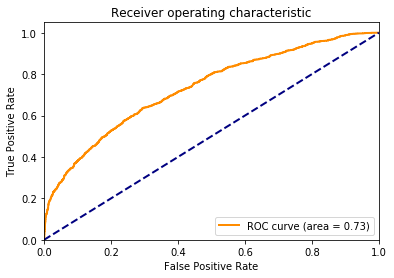

In [60]:



# In[271]:


fpr = dict()
tpr = dict()
roc_auc = dict()
fpr[1], tpr[1], _ = roc_curve(Y_test[:, 0], y_pred[:, 0])
roc_auc[1] = auc(fpr[1], tpr[1])


# In[272]:


display(roc_auc)


# In[275]:


plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

In [ ]:
for layer in model.layers:
    layer.trainable= False
    break

In [ ]:
print(model.summary())

In [ ]:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30,batch_size=50,verbose=1)

In [ ]:
scores = model.evaluate(X_test, Y_test)
scores[1]*100